# Importing libraires

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

/Users/adrianfernandes/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Exploring the malware dataset. <br/>
Malware Dataset:https://github.com/PacktPublishing/Mastering-Machine-Learning-for-Penetration-Testing/blob/master/Chapter03/MalwareData.csv.gz <br/>
<br/>
* 41,323 binaries (exe ,dll) - legitimate
* 96,724 malware files from virusshare.com


In [2]:
malData=pd.read_csv("MalwareData.csv", sep="|", low_memory =True )

In [3]:
malData.head()

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1


In [4]:
malData.shape

(138047, 57)

In [5]:
malData.describe()

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
count,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,...,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,138047.000000,138047.000000
mean,4259.069274,225.845632,4444.145994,8.619774,3.819286,2.425956e+05,4.504867e+05,1.009525e+05,1.719561e+05,5.779845e+04,...,22.050700,4.000127,2.434541,5.521610,5.545093e+04,1.818082e+04,2.465903e+05,4.656750e+05,12.363115,0.299340
std,10880.347245,5.121399,8186.782524,4.088757,11.862675,5.754485e+06,2.101599e+07,1.635288e+07,3.430553e+06,5.527658e+06,...,136.494244,1.112981,0.815577,1.597403,7.799163e+06,6.502369e+06,2.124860e+07,2.608987e+07,6.798878,0.457971
min,332.000000,224.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,332.000000,224.000000,258.000000,8.000000,0.000000,3.020800e+04,2.457600e+04,0.000000e+00,1.272100e+04,4.096000e+03,...,5.000000,3.458505,2.178748,4.828706,9.560000e+02,4.800000e+01,2.216000e+03,0.000000e+00,13.000000,0.000000
50%,332.000000,224.000000,258.000000,9.000000,0.000000,1.136640e+05,2.631680e+05,0.000000e+00,5.288300e+04,4.096000e+03,...,6.000000,3.729824,2.458492,5.317552,2.708154e+03,4.800000e+01,9.640000e+03,7.200000e+01,15.000000,0.000000
75%,332.000000,224.000000,8226.000000,10.000000,0.000000,1.203200e+05,3.850240e+05,0.000000e+00,6.157800e+04,4.096000e+03,...,13.000000,4.233051,2.696833,6.502239,6.558429e+03,1.320000e+02,2.378000e+04,7.200000e+01,16.000000,1.000000
max,34404.000000,352.000000,49551.000000,255.000000,255.000000,1.818587e+09,4.294966e+09,4.294941e+09,1.074484e+09,2.028711e+09,...,7694.000000,7.999723,7.999723,8.000000,2.415919e+09,2.415919e+09,4.294903e+09,4.294967e+09,26.000000,1.000000


In [6]:
legit= malData[0:41323].drop(["legitimate"], axis=1)
mal= malData[41323::].drop(["legitimate"], axis=1)
print("The shape of the legit dataset is: %s samples, %s features"%(legit.shape[0],legit.shape[1]))
print("The shape of the mal dataset is: %s samples, % s features" %(mal.shape[0],mal.shape[1]))

The shape of the legit dataset is: 41323 samples, 56 features
The shape of the mal dataset is: 96724 samples, 56 features


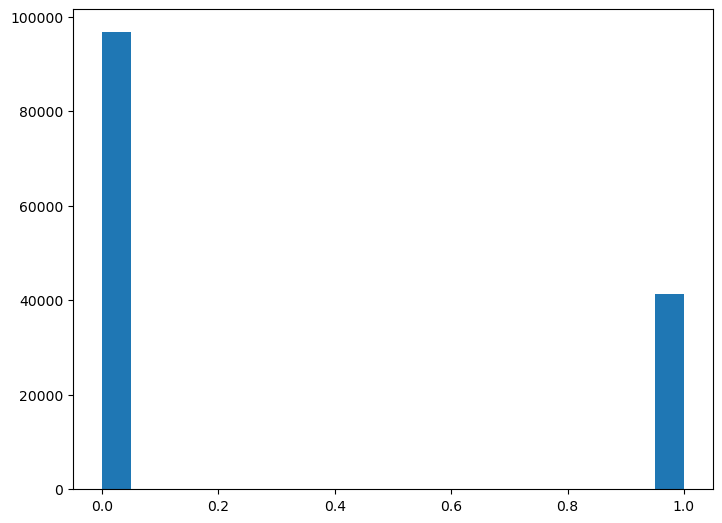

In [7]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.hist(malData['legitimate'],20)
plt.show()

# Data Cleaning

In [8]:
y=malData['legitimate']
malData=malData.drop(['legitimate'],axis=1)

In [9]:
malData=malData.drop(['Name'],axis=1)
malData=malData.drop(['md5'],axis=1)
print(" The Name and md5 variables are removed successfully")

 The Name and md5 variables are removed successfully


In [10]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2
# X_new = SelectKBest(chi2, k=2).fit_transform(malData, y)
# X_new.shape

# Spliting the dataset into test and train

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(malData,y, test_size=0.2, random_state=42)

In [12]:
X_train.shape

(110437, 54)

# Model Building </br> </br>
## 1- Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import make_classification

clf = RandomForestClassifier(max_depth=2, random_state=0)

randomModel=clf.fit(X_train, y_train)



## Random forest Evaluation on test data

In [14]:
from sklearn.metrics import f1_score,accuracy_score,auc,confusion_matrix


In [15]:
#  Accuracy on the train dataset

train_pred=randomModel.predict(X_train)

accuracy_score(y_train,train_pred)

0.9828318407780001

In [16]:
# Accuracy on the test dataset

prediction=randomModel.predict(X_test)

accuracy_score(y_test,prediction)

0.9838102136906918

In [17]:
f1_score(y_test, prediction)

0.9730933606212002

## Confusion matrix

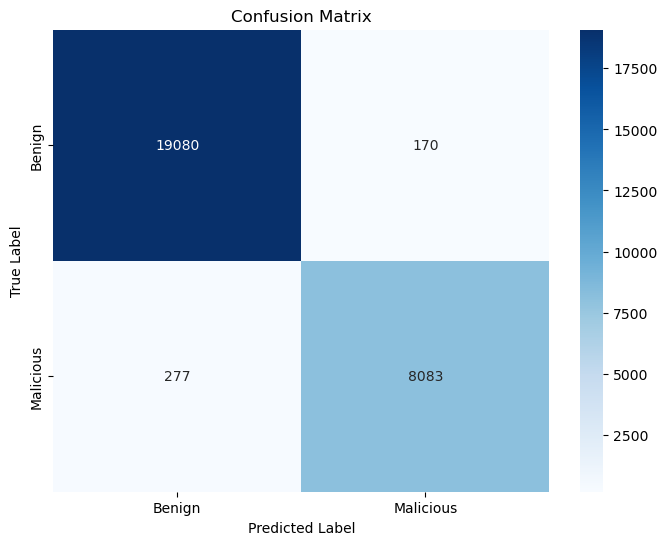

In [30]:
conf_matrix = confusion_matrix(y_test, prediction)

# Display the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=["Benign", "Malicious"], 
            yticklabels=["Benign", "Malicious"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## 2 - logistic regression

In [18]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0)

logModel=clf.fit(X_train, y_train)

/Users/adrianfernandes/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Model Evaluation

In [19]:
# Accuracy on the train dataset

train_log= logModel.predict(X_train)

accuracy_score(y_train,train_log)



0.9555764825194455

In [20]:
# Accuracy on the test dataset

pred=logModel.predict(X_test)

accuracy_score(y_test,pred)


0.9565737051792829

In [21]:
f1_score(y_test, pred)


0.9240129285759554

## Confusion matrix

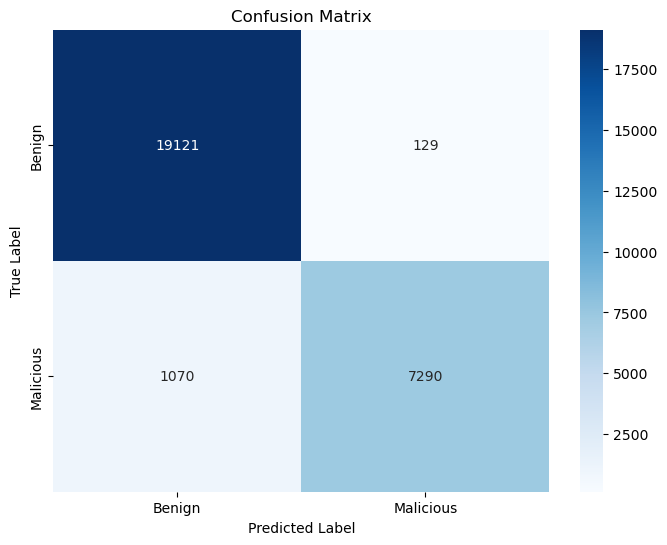

In [31]:
conf_matrix = confusion_matrix(y_test, pred)

# Display the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=["Benign", "Malicious"], 
            yticklabels=["Benign", "Malicious"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## 3- SGD Classifier

In [22]:
from sklearn.linear_model import SGDClassifier

In [23]:
sgd_classifier = SGDClassifier(loss='hinge', random_state=42)

In [24]:
sgdModel = sgd_classifier.fit(X_train, y_train)

In [26]:
# Accuracy on the train dataset

train_model= sgdModel.predict(X_train)

accuracy_score(y_train,train_model)


0.38824850367177666

In [28]:
# Accuracy on the test dataset

y_pred=sgdModel.predict(X_test)

accuracy_score(y_test,y_pred)

0.3929373415429192

In [29]:
f1_score(y_test, y_pred)

0.49824876515491695

## Confusion Matrix 

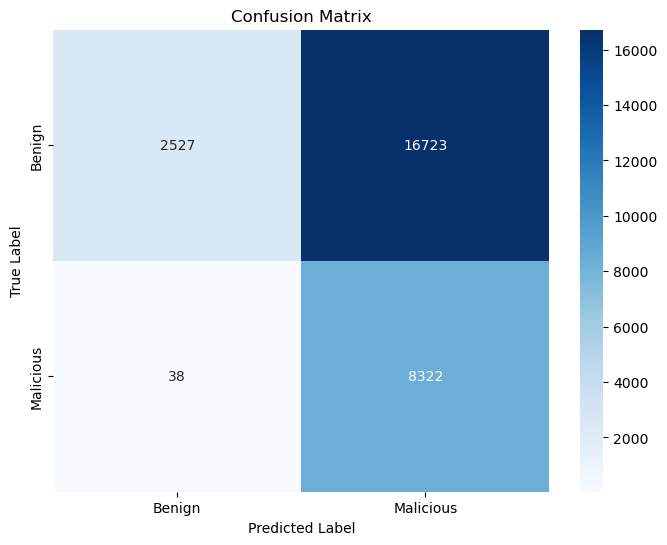

In [32]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=["Benign", "Malicious"], 
            yticklabels=["Benign", "Malicious"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## 4- Neural Network

In [33]:
import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense


In [34]:
# Define model
model = Sequential()
model.add(Dense(16, input_dim=54, activation= "relu"))
model.add(Dense(8, activation= "relu"))
model.add(Dense(4, activation= "relu"))
model.add(Dense(1, activation='sigmoid'))
model.summary() #Print model Summary

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                880       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 1057 (4.13 KB)
Trainable params: 1057 (4.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
# Compile model
model.compile(loss= "binary_crossentropy" , optimizer="rmsprop", metrics=["accuracy"])

In [36]:
# Fit Model
model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
3452/3452 [==============================] - 2s 504us/step - loss: 103055984.0000 - accuracy: 0.9503
Epoch 2/5
3452/3452 [==============================] - 2s 490us/step - loss: 12858456.0000 - accuracy: 0.9537
Epoch 3/5
3452/3452 [==============================] - 2s 483us/step - loss: 8833407.0000 - accuracy: 0.9592
Epoch 4/5
3452/3452 [==============================] - 2s 479us/step - loss: 5841911.0000 - accuracy: 0.9586
Epoch 5/5
3452/3452 [==============================] - 2s 479us/step - loss: 8013918.0000 - accuracy: 0.9594


## Model evaluation

In [37]:
# Accuracy on the training dataset
trainPred=model.predict(X_train)

trainPred=[1 if y>= 0.5 else 0   for y in trainPred]

accuracy_score(y_train,trainPred)

3452/3452 [==============================] - 1s 345us/step


0.9443755263181723

In [38]:
# Accuracy on the test dataset
y_prediction=model.predict(X_test)

y_prediction=[1 if y>= 0.5 else 0   for y in y_prediction]

accuracy_score(y_test, y_prediction)

863/863 [==============================] - 0s 365us/step


0.9446577327055414

In [39]:
confusion_matrix(y_test,y_prediction)

array([[18331,   919],
       [  609,  7751]])

In [40]:
f1_score(y_test,y_prediction)

0.9102759835584263

## Confusion Matrix

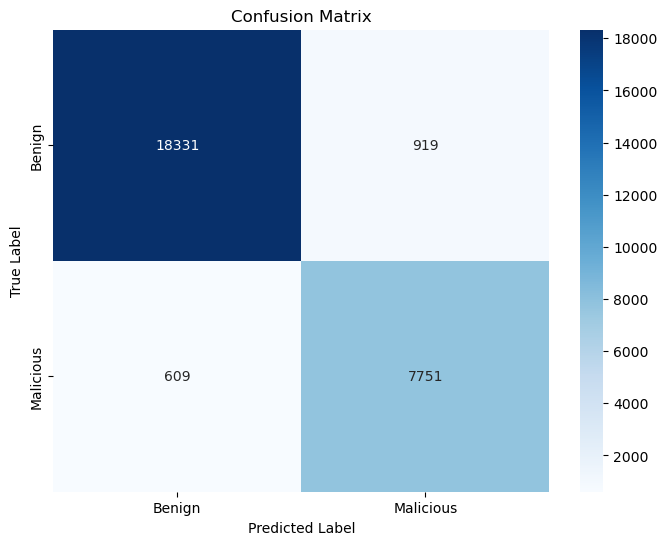

In [41]:
conf_matrix = confusion_matrix(y_test, y_prediction)

# Display the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=["Benign", "Malicious"], 
            yticklabels=["Benign", "Malicious"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()